In [239]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import sklearn.model_selection as skl_model
import torch
from torch import nn  
import matplotlib.pyplot as plt 

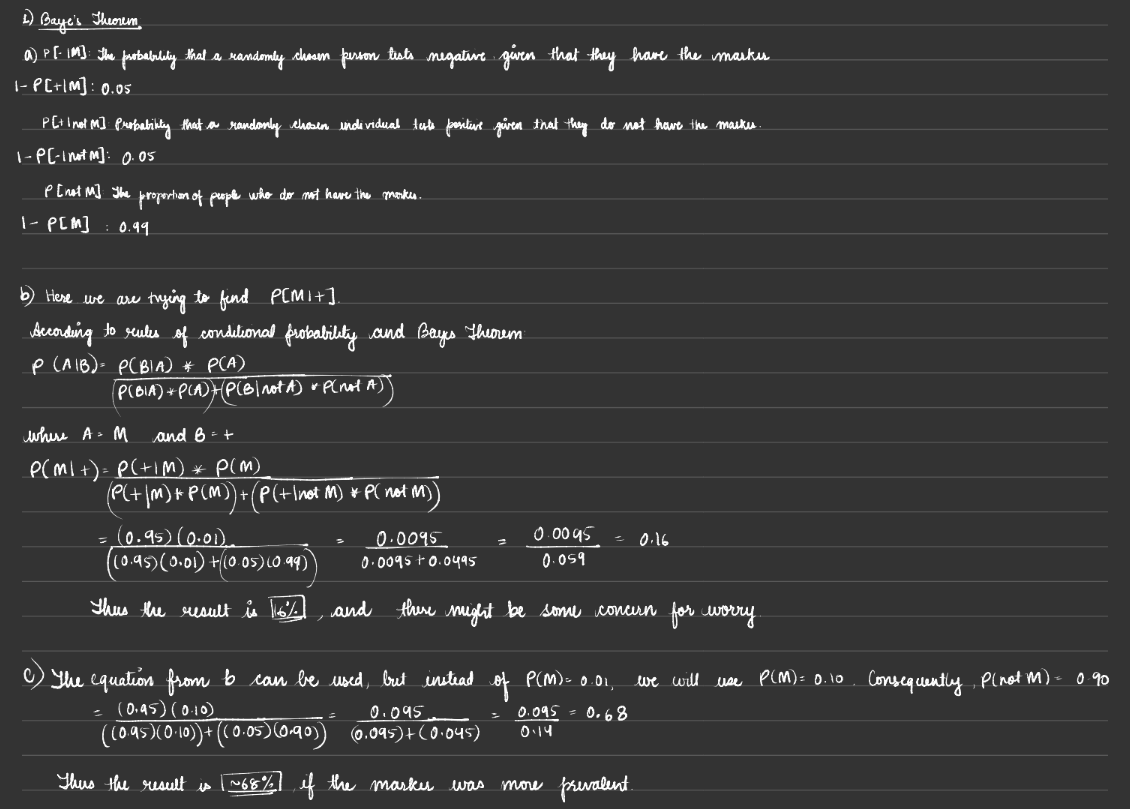

In [240]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [241]:
wines = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/CHEM277B/Homework5/wines.csv")
wines.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1


In [242]:
class NaiveBayesClassifier():
    def __init__(self):
        self.type_indices={}    # store the indices of wines that belong to each cultivar as a boolean array of length 178
        self.type_stats={}      # store the mean and std of each cultivar
        self.ndata = 0
        self.trained=False
    
    @staticmethod
    def gaussian(x,mean,std):
        # 2a) I chose this function form because it closely represents the probability distribution and takes into account the standard deviation and the mean
        return 1/(std*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mean)/std)**2)
    
    @staticmethod
    def calculate_statistics(x_values):
        # Returns a list with length of input features. Each element is a tuple, with the input feature's average and standard deviation
        n_feats=x_values.shape[1]
        return [(np.average(x_values[:,n]),np.std(x_values[:,n])) for n in range(n_feats)]
    
    @staticmethod
    def calculate_prob(x_input,stats):
        """Calculate the probability that the input features belong to a specific class(P(X|C)), defined by the statistics of features in that class
        x_input: np.array shape(nfeatures)
        stats: list of tuple [(mean1,std1),(means2,std2),...]
        """ 
        init_prob=1
        for i in range(len(x_input)):
            init_prob*=NaiveBayesClassifier.gaussian(x_input[i],stats[i][0],stats[i][1])
        return init_prob
    
    def fit(self,xs,ys):
        # Train the classifier by calculating the statistics of different features in each class
        self.ndata = len(ys)
        for y in set(ys):
            type_filter= (ys==y)
            self.type_indices[y]=type_filter
            self.type_stats[y]=self.calculate_statistics(xs[type_filter])
        self.trained=True
            
    def predict(self,xs):
        # Do the prediction by outputing the class that has highest probability
        if len(xs.shape)>1:
            print("Only accepts one sample at a time!")
        if self.trained:
            guess=None
            max_prob=0
            # P(C|X) = P(X|C)*P(C) / sum_i(P(X|C_i)*P(C_i)) (deniminator for normalization only, can be ignored)
            for y_type in self.type_stats:
                prob= self.calculate_prob(xs,self.type_stats[y_type]) * np.sum(self.type_indices[y_type])/self.ndata
                if prob>max_prob:
                    max_prob=prob
                    guess=y_type
            return guess
        else:
            print("Please train the classifier first!")

In [243]:
def calculate_accuracy(model,xs,ys):
    y_pred=np.zeros_like(ys)
    for idx,x in enumerate(xs):
        y_pred[idx]=model.predict(x)
    return np.sum(ys==y_pred)/len(ys)

In [244]:
model = NaiveBayesClassifier()
stats1 = model.calculate_statistics(wines[wines['ranking']==1].iloc[:,0:].values)
stats2 = model.calculate_statistics(wines[wines['ranking']==2].iloc[:,0:].values)
stats3 = model.calculate_statistics(wines[wines['ranking']==3].iloc[:,0:].values)

print(model.calculate_prob([13], stats1))

0.23236757865410357


In [245]:
# Calculate the norm of each column
mean = wines.mean(axis=0)
std = wines.std(axis=0)
wines_norm = (wines - mean) / std
wines_norm

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,-1.240406,-1.210529
1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,-1.240406,-1.210529
2,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,-1.240406,-1.210529
3,1.378844,-0.766550,-0.169557,-0.806975,-0.331985,-0.151973,0.401188,-0.818411,-0.036514,-0.025057,0.929908,0.293405,1.692900,-1.240406,-1.210529
4,0.923081,-0.542765,0.158499,-1.046527,-0.752080,0.487157,0.731565,-0.577356,0.382804,0.233755,0.842408,0.406082,1.819921,-1.240406,-1.210529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.491955,2.026281,1.798775,1.648436,0.858284,-0.503494,-1.070491,-0.738059,-0.840205,1.484679,-1.257591,-0.974218,-0.371199,1.199288,1.370000
174,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,1.199288,1.370000
175,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,1.199288,1.370000
176,1.391162,1.578712,1.361368,1.498716,-0.261969,-0.391646,-1.270720,1.592131,-0.420888,1.786626,-1.520090,-1.424928,-0.593486,1.199288,1.370000


In [246]:
from pandas._libs.window.indexers import calculate_variable_window_bounds
X= wines.drop(["Start assignment","ranking"],axis=1).values
y= wines['ranking'].values

#divide in k=3 fold split 
kf = skl_model.KFold(n_splits = 3, shuffle = True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # test a 1/3 of the data for training 
    model = NaiveBayesClassifier()
    model.fit(X_train,y_train)
    #predict only takes on sample at a time 
    y_pred = np.array([model.predict(x) for x in X_test])
    print(f'Accuracy for kfold {i} is {calculate_accuracy(model, X_test, y_test)}')
    i += 1

Accuracy for kfold 1 is 0.9666666666666667
Accuracy for kfold 2 is 0.9491525423728814
Accuracy for kfold 3 is 1.0


2c) Naive Bayes performs much more better than the previous methods of simulated annealing. 

In [247]:
# Convert the features and labels to PyTorch tensors
features = torch.tensor(x[:,:], dtype=torch.float32)
labels = torch.tensor(y, dtype=torch.int64)

# Define the model
model = nn.Sequential(
    nn.Linear(features.shape[1], len(np.unique(labels)))
)

# Pass the data through the network once without backpropagation
outputs = model(features)

# Print out the output
print(outputs)

tensor([[-110.8058,  112.1062,  215.3565],
        [ -83.8705,   77.0823,  143.2351],
        [-103.4146,  108.1426,  214.7194],
        [-121.0529,  131.1731,  266.2621],
        [-122.9520,  135.1693,  275.6492],
        [-126.4517,  132.7410,  262.5747],
        [ -88.6803,   83.1630,  152.7970],
        [-100.3573,  103.8871,  208.1241],
        [ -87.5734,   86.0920,  170.4018],
        [-121.1675,  131.3685,  267.6390],
        [-102.1993,  106.4359,  212.5467],
        [-125.2340,  128.8483,  251.5977],
        [ -93.2037,   92.2887,  176.8620],
        [-108.1334,  113.5284,  227.4430],
        [-108.1066,  113.2548,  224.9065],
        [ -92.8710,   92.1223,  178.0279],
        [-105.8790,  109.5665,  216.4145],
        [-119.5808,  129.7167,  262.8820],
        [-117.5651,  124.2440,  244.4391],
        [-124.2350,  133.0612,  265.4703],
        [ -75.7908,   71.1565,  134.3548],
        [ -52.9104,   43.1367,   78.1989],
        [ -57.2381,   51.6818,   97.6219],
        [ -

In [248]:
# Define the model
model_test2 = nn.Sequential(
    nn.Linear(features.shape[1], len(np.unique(labels))),
    nn.Softmax(dim=1)
)

# Pass the data through the network once with backpropagation
outputs = model_test2(features)

# Print out the output
print(outputs)

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 4

Softmax provides much more consistent data, as opposed to without softmax which provided extremely high values. Additionally, the sum of the three values adds up to 1 due to noramlization which allows for easier analysis. 

In [249]:
def train_and_val(model,train_X,train_y,epochs,draw_curve=True):
    """
    Parameters
    --------------
    model: a PyTorch model
    train_X: np.array shape(ndata,nfeatures)
    train_y: np.array shape(ndata)
    epochs: int
    draw_curve: bool
    """
    ### Define your loss function, optimizer. Convert data to torch tensor ###
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    

    ### Split training examples further into training and validation ###
    train_X = torch.tensor(train_X, dtype=torch.float32)
    train_y = torch.tensor(train_y, dtype=torch.long)

    #KFold 
    kf = skl_model.KFold(n_splits=3,shuffle=True)
    for train_index, test_index in kf.split(train_X):
        train_Xs=train_X[train_index]
        train_ys=train_y[train_index]
        test_Xs=train_X[test_index]
        test_ys=train_y[test_index]
    
        val_array=[]
        best_loss = np.inf
        best_weights = {}

        # Split training examples further into training and validation
        train_in, val_in, train_real, val_real = train_test_split(train_Xs, train_ys, test_size=0.2)
    
        for i in range(epochs):
          preds = model(train_in)
          loss_train = loss_func(preds, train_real)

          ### Compute the loss and do backpropagation ###
          optimizer.zero_grad()
          loss_train.backward()
          optimizer.step()

          ### compute validation loss and keep track of the lowest val loss ###
          val_out = model(val_in)
          loss_val = loss_func(val_out, val_real)
          val_array.append(loss_val.item())
          if loss_val < best_loss:
            best_loss = loss_val
            best_weights = model.state_dict()
                
     # The final number of epochs is when the minimum error in validation set occurs    
    final_epochs=np.argmin(val_array)+1
    print("Number of epochs with lowest validation:",final_epochs)
    ### Recover the model weight ###
    model.load_state_dict(best_weights)

    if draw_curve:
        plt.figure()
        plt.plot(np.arange(len(val_array))+1,val_array,label='Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    return model, final_epochs

Number of epochs with lowest validation: 1


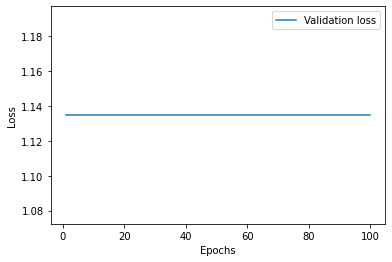

In [250]:
# Run the function on wine data set 
model = nn.Sequential(
    nn.Linear(features.shape[1], len(np.unique(labels))),
    nn.Softmax(dim=1)
#     nn.identity()
)
y = y - 1
model,final_epochs = train_and_val(model,X,y,100)